<a href="https://colab.research.google.com/github/politerishi/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CORIZO - Data Science & Business Analytics Internship**


# **Minor Project  -  Stock Price Prediction**

## Author : RISHI KUMAR

### Steps:
####    Importing the dataset and know our dataset
####    Visualizing the dataset
####     Data preparation
####     Training the algorithm
####     Visualizing the model
####     Evaluating the model

# Instructions
The art of forecasting stock prices has been a difficult task for many of the researchers and analysts. In fact, investors are highly interested in the research area of stock price prediction. For a good and successful investment, many investors are keen on knowing the future situation of the stock market. Good and effective prediction systems for the stock market help traders, investors, and analyst by providing supportive information like the future direction of the stock market.

To Download the dataset into CSV visit this website- https://cloudconvert.com/xls-to-csv

# Steps 1: Importing the dataset and know our dataset

**In this step, we will import the dataset through the link with the help of pandas library and then we will observe the data.**

In [1]:
# import Necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
#to display all the graph in the workbook 
%matplotlib inline
sns.set_style("whitegrid",{'grid.linestyle': '--'})
import warnings
warnings.filterwarnings("ignore")

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [83]:
import math
import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

In [84]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [85]:
from sklearn.metrics import precision_recall_fscore_support

In [6]:
data = "https://github.com/politerishi/Stock-Price-Prediction/blob/main/1767133-1729258-1613615-Stock_Price_data_set_(1).xlsx?raw=true"

In [7]:
df = pd.read_excel(data)

In [8]:
#reading data
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0
...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0


### Dataset First and Last View of our dataset

In [9]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0


In [10]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0
1008,2022-02-04,407.309998,412.769989,396.640015,410.170013,410.170013,7782400.0


### Dataset Rows & Columns count

In [11]:
# Dataset Rows & Columns count
df.shape

(1009, 7)

From this, we got to know that there are 1009 rows of data available and for each row, we have 7 different features or columns.

### Dataset Information


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1009 non-null   datetime64[ns]
 1   Open       1009 non-null   float64       
 2   High       1009 non-null   float64       
 3   Low        1009 non-null   float64       
 4   Close      1009 non-null   float64       
 5   Adj Close  1009 non-null   float64       
 6   Volume     1009 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 55.3 KB


In [13]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [14]:
# Dataset Describe
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,1009.0,4.190597e+02,1.085375e+02,2.339200e+02,3.314900e+02,3.777700e+02,5.091300e+02,6.923500e+02
High,1009.0,4.253207e+02,1.092630e+02,2.506500e+02,3.363000e+02,3.830100e+02,5.156300e+02,7.009900e+02
Low,1009.0,4.123740e+02,1.075559e+02,2.312300e+02,3.260000e+02,3.708800e+02,5.025300e+02,6.860900e+02
Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Adj Close,1009.0,4.190007e+02,1.082900e+02,2.338800e+02,3.316200e+02,3.786700e+02,5.090800e+02,6.916900e+02
Volume,1009.0,7.570685e+06,5.465535e+06,1.144000e+06,4.091900e+06,5.934500e+06,9.322400e+06,5.890430e+07


#### Duplicate Values

In [15]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

<AxesSubplot:ylabel='count'>

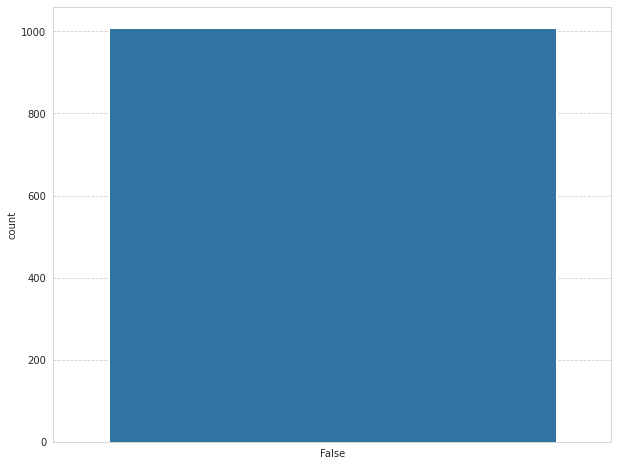

In [16]:
# Visulizing                          #true means duplicate data
plt.figure(figsize=(10,8))
sns.countplot(x=df.duplicated())

#### Missing Values/Null Values

In [17]:
# Missing Values/Null Values Count
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

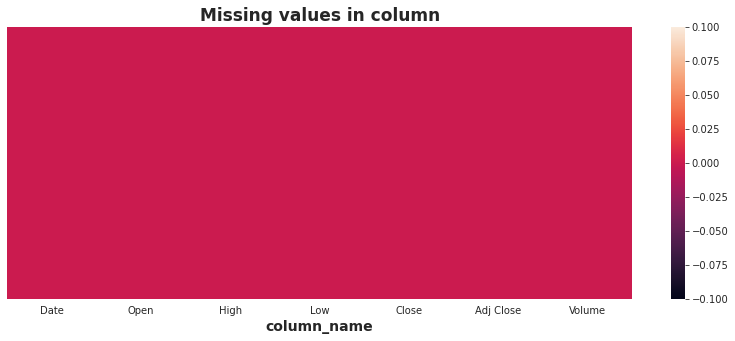

In [18]:
# Visualizing the missing values
 # Checking Null Value by plotting Heatmap
plt.figure(figsize=(14, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("column_name", size=14, weight="bold")
plt.title("Missing values in column",fontweight="bold",size=17)
plt.show()

# STEP 2 : Visualizing the dataset
# Exploratory Data Analysis 

EDA is an approach to analyzing the data using visual techniques. It is used to discover trends, and patterns, or to check assumptions with the help of statistical summaries and graphical representations. 

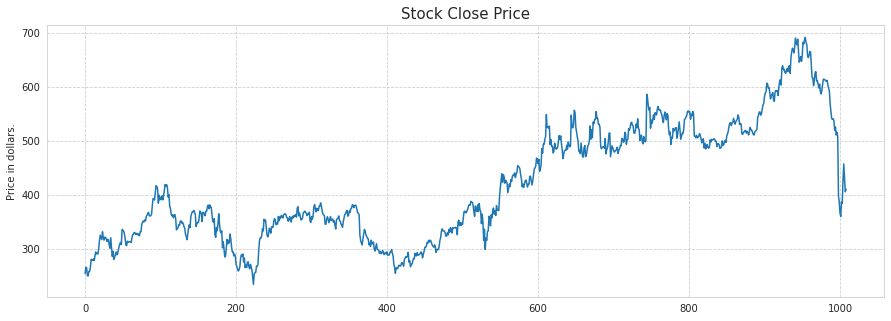

In [25]:

plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Stock Close Price', fontsize=15)
plt.ylabel('Price in dollars.')
plt.show()

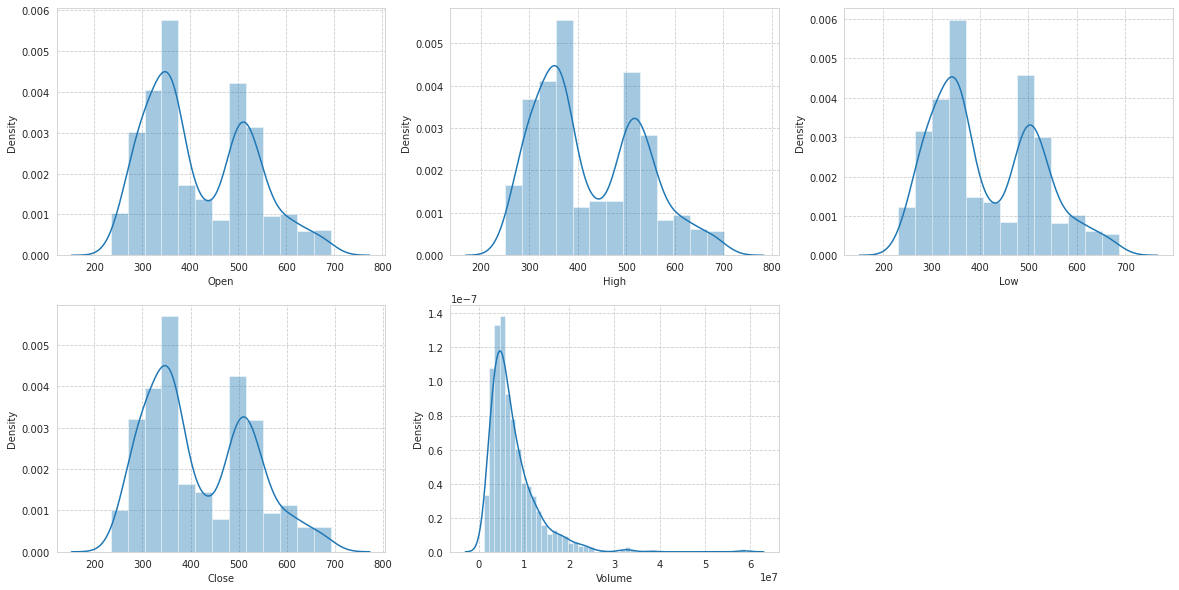

In [30]:

features = ['Open', 'High', 'Low', 'Close', 'Volume']
 
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.distplot(df[col])
plt.show()

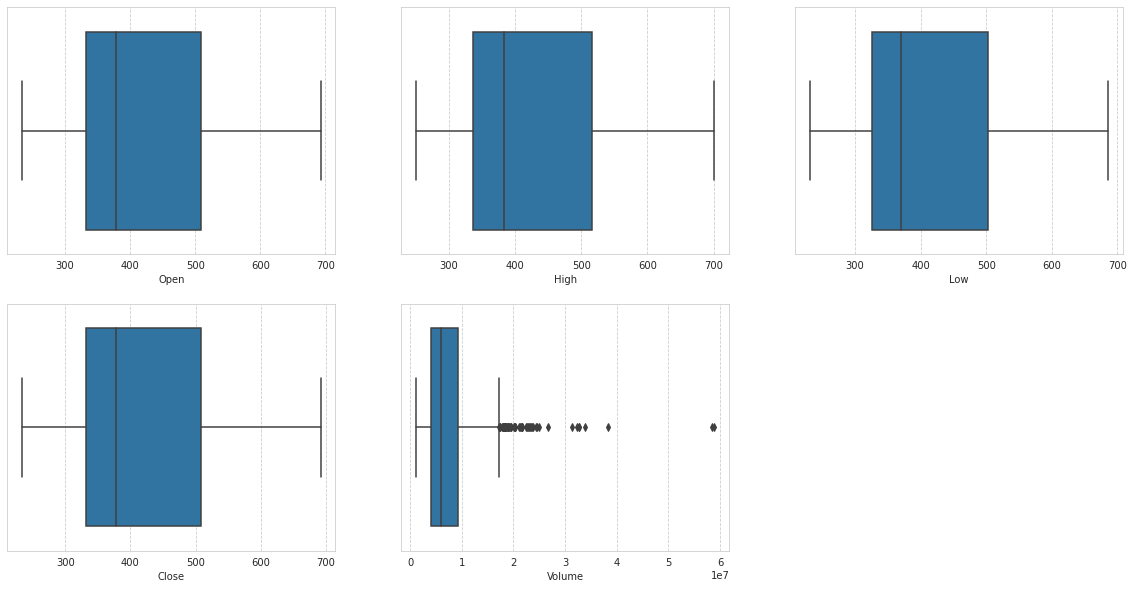

In [31]:
plt.subplots(figsize=(20,10))
for i, col in enumerate(features):
  plt.subplot(2,3,i+1)
  sns.boxplot(df[col])
plt.show()


From the above boxplots, we can conclude that only volume data contains outliers in it but the data in the rest of the columns are free from any outlier.

In [43]:
import datetime

In [46]:
df["day"] = df['Date'].map(lambda x: x.day)
df["month"] = df['Date'].map(lambda x: x.month)
df["year"] = df['Date'].map(lambda x: x.year)

In [56]:

df['is_quarter_end'] = np.where(df['month']%3==0,1,0)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,5,2,2018,0
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,6,2,2018,0
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,7,2,2018,0
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,8,2,2018,0
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,9,2,2018,0


In [57]:
df["is_quarter_end"].value_counts()

0    672
1    337
Name: is_quarter_end, dtype: int64

In [49]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,5,2,2018
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,6,2,2018
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,7,2,2018
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,8,2,2018
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,9,2,2018


In [52]:
df["year"].value_counts()

2020    253
2019    252
2021    252
2018    228
2022     24
Name: year, dtype: int64

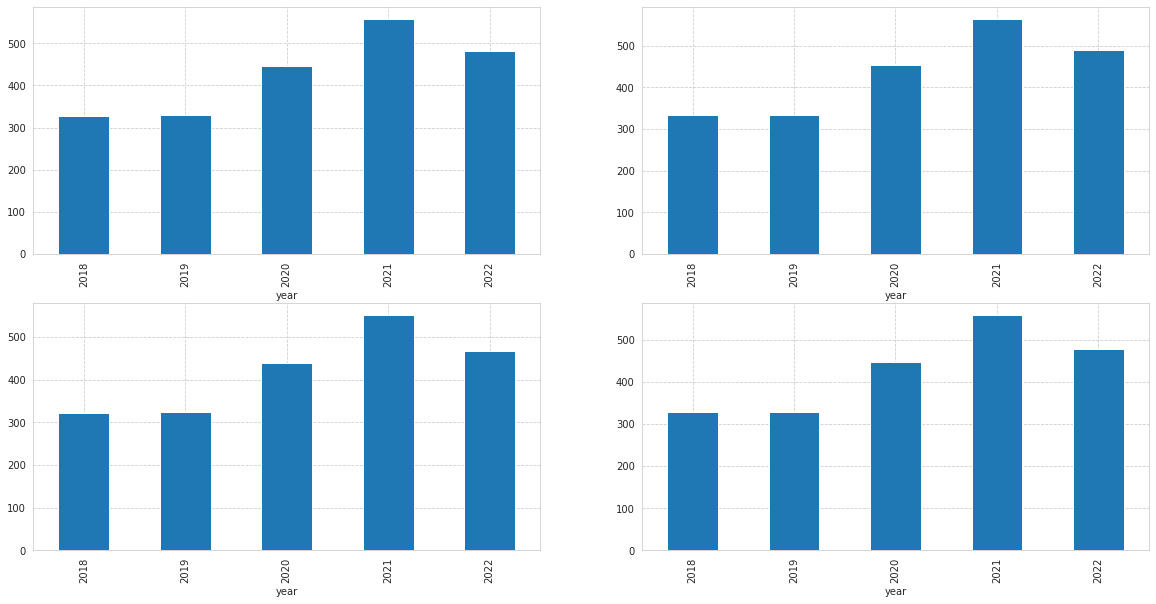

In [50]:

data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,10))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
plt.show()

In [58]:
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [60]:

df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']

In [61]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,day,month,year,is_quarter_end,target,open-close,low-high
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100.0,5,2,2018,0,1,7.740005,-17.869995
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800.0,6,2,2018,0,0,-18.020004,-21.700012
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500.0,7,2,2018,0,0,2.019989,-8.120025
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700.0,8,2,2018,0,0,16.979981,-17.619995
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900.0,9,2,2018,0,1,4.380005,-19.690002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1004,2022-01-31,401.970001,427.700012,398.200012,427.140015,427.140015,20047500.0,31,1,2022,0,1,-25.170014,-29.500000
1005,2022-02-01,432.959991,458.480011,425.540009,457.130005,457.130005,22542300.0,1,2,2022,0,0,-24.170014,-32.940002
1006,2022-02-02,448.250000,451.980011,426.480011,429.480011,429.480011,14346000.0,2,2,2022,0,0,18.769989,-25.500000
1007,2022-02-03,421.440002,429.260010,404.279999,405.600006,405.600006,9905200.0,3,2,2022,0,1,15.839996,-24.980011


Above we have added some more columns which will help in the training of our model. We have added the target feature which is a signal whether to buy or not we will train our model to predict this only.

In [64]:
df["target"].value_counts()

1    516
0    493
Name: target, dtype: int64

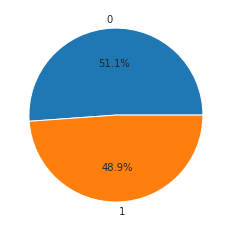

In [62]:
plt.pie(df['target'].value_counts().values,
        labels=[0, 1], autopct='%1.1f%%')
plt.show()

When we add features to our dataset we have to ensure that there are no highly correlated features as they do not help in the learning process of the algorithm.

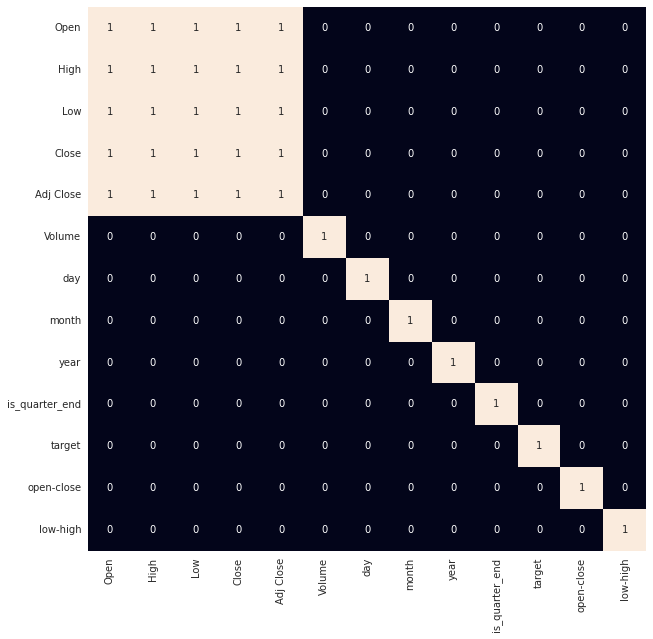

In [63]:

plt.figure(figsize=(10, 10))
 
# As our concern is with the highly
# correlated features only so, we will visualize
# our heatmap as per that criteria only.
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

From the above heatmap, we can say that there is a high correlation between OHLC that is pretty obvious, and the added features are not highly correlated with each other or previously provided features which means that we are good to go and build our model.

# Data Splitting and Normalization

In [66]:
X = df[['open-close', 'low-high', 'is_quarter_end' , 'Volume']]
y = df['target']






In [67]:
X

,open-close,low-high,is_quarter_end,Volume
0,7.740005,-17.869995,0,11896100.0
1,-18.020004,-21.700012,0,12595800.0
2,2.019989,-8.120025,0,8981500.0
3,16.979981,-17.619995,0,9306700.0
4,4.380005,-19.690002,0,16906900.0
...,...,...,...,...
1004,-25.170014,-29.500000,0,20047500.0
1005,-24.170014,-32.940002,0,22542300.0
1006,18.769989,-25.500000,0,14346000.0
1007,15.839996,-24.980011,0,9905200.0


In [68]:
y

0       1
1       0
2       0
3       0
4       1
       ..
1004    1
1005    0
1006    0
1007    1
1008    0
Name: target, Length: 1009, dtype: int64

In [69]:
#spliting

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [71]:
scaler = StandardScaler()
features = scaler.fit_transform(X)

In [72]:
print(X_train.shape, X_test.shape)

(756, 4) (253, 4)


After selecting the 'X' to train the model on we should normalize the data because normalized data leads to stable and fast training of the model. After that whole data has been split into two parts with a 75/25 ratio so, that we can evaluate the performance of our model on unseen data.

# Model Development and Evaluation
Now is the time to train some state-of-the-art machine learning models(Logistic Regression, Support Vector Machine, XGBClassifier), and then based on their performance on the training and validation data we will choose which ML model is serving the purpose at hand better.

For the evaluation metric, we will use the ROC-AUC curve but why this is because instead of predicting the hard probability that is 0 or 1 we would like it to predict soft probabilities that are continuous values between 0 to 1. And with soft probabilities, the ROC-AUC curve is generally used to measure the accuracy of the predictions.

# Creating Function to train linear models and calculate scores

In [78]:
model_accuracy=[]
model_precision=[]
model_recall=[]
model_f1_score=[]
model_roc_auc_score=[]

In [86]:
# Creating Function to run diferent models
def run_and_evaluate_model(model,X_train,X_test,y_train,y_test, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  stop = time.time()

  time_min=round((stop - start)/60,4)
  print(f"Training time: {time_min}min",'\n')
  


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  
  # Get the confusion matrix for both train and test
  from sklearn.metrics import confusion_matrix,classification_report

  def score (model,X,actual,predicted,append=True):
    accuracy = accuracy_score(actual,predicted)
    precision = precision_score(actual,predicted)
    recall = recall_score(actual,predicted)
    f1 = f1_score(actual,predicted)
    roc= roc_auc_score(actual,predicted)
    confusion_mat=confusion_matrix(actual,predicted)
    print("The accuracy is ", accuracy)
    print("The precision is ", precision)
    print("The recall is ", recall)
    print("The f1 is ", f1)
    print('the roc_auc_score  is ',roc)
    print('\nconfusion_matrix \n ',confusion_mat)
    

    if append==True:
      model_accuracy.append(accuracy)
      model_precision.append(precision)
      model_recall.append(recall)
      model_f1_score.append(f1)
      model_roc_auc_score.append(roc)
    else:
      pass

  print('score matrix for train')
  print('*'*80)
  score(model=model,X=X_train,actual=y_train,predicted=y_pred_train,append=False)
  print('\nClassification Report\n')
  print(classification_report(y_train, y_pred_train))
  print('\n')
  print('score matrix for test')
  print('*'*80)
  score(model=model,X=X_test,actual=y_test,predicted=y_pred_test)
  print('\nClassification Report\n')
  print(classification_report(y_test, y_pred_test))


### ML Model - 1 --   Implementing Logistic Regression

In [75]:
# import Loggistic Regression
from sklearn.linear_model import LogisticRegression

In [76]:
# ML Model - 1 Implementation
log_model = LogisticRegression(fit_intercept=True, max_iter=10000)
# Fit the Algorithm
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

 Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [87]:
#running and evaluating log_model using function ccreated
run_and_evaluate_model(log_model,X_train,X_test,y_train,y_test)

Training time: 0.0001min 

score matrix for train
********************************************************************************
The accuracy is  0.5317460317460317
The precision is  0.5317460317460317
The recall is  1.0
The f1 is  0.694300518134715
the roc_auc_score  is  0.5

confusion_matrix 
  [[  0 354]
 [  0 402]]

Classification Report

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       354
           1       0.53      1.00      0.69       402

    accuracy                           0.53       756
   macro avg       0.27      0.50      0.35       756
weighted avg       0.28      0.53      0.37       756



score matrix for test
********************************************************************************
The accuracy is  0.4505928853754941
The precision is  0.4505928853754941
The recall is  1.0
The f1 is  0.6212534059945504
the roc_auc_score  is  0.5

confusion_matrix 
  [[  0 139]
 [  0 114]]

Classification Report

    

### ML Model - 2  --  Implementing  Support Vector Machine

In [91]:
#importing SVM
from sklearn.svm import SVC
svc_model=SVC()

In [92]:
# training and evaluating the SVC model 
run_and_evaluate_model(svc_model,X_train,X_test,y_train,y_test)

Training time: 0.0005min 

score matrix for train
********************************************************************************
The accuracy is  0.5423280423280423
The precision is  0.5392156862745098
The recall is  0.9577114427860697
The f1 is  0.6899641577060931
the roc_auc_score  is  0.5141664558563117

confusion_matrix 
  [[ 25 329]
 [ 17 385]]

Classification Report

              precision    recall  f1-score   support

           0       0.60      0.07      0.13       354
           1       0.54      0.96      0.69       402

    accuracy                           0.54       756
   macro avg       0.57      0.51      0.41       756
weighted avg       0.57      0.54      0.43       756



score matrix for test
********************************************************************************
The accuracy is  0.4743083003952569
The precision is  0.4605809128630705
The recall is  0.9736842105263158
The f1 is  0.6253521126760563
the roc_auc_score  is  0.5192162059825824

confusion_

### ML Model - 3  --  Implementing  XGboost

In [93]:
from xgboost import XGBClassifier

In [94]:
# creating XGBRegressor model
xgboost_model=XGBClassifier()

In [95]:
# training and evaluating the Xgboost model
run_and_evaluate_model(xgboost_model,X_train,X_test,y_train,y_test)

Training time: 0.0039min 

score matrix for train
********************************************************************************
The accuracy is  0.9973544973544973
The precision is  0.995049504950495
The recall is  1.0
The f1 is  0.9975186104218362
the roc_auc_score  is  0.9971751412429379

confusion_matrix 
  [[352   2]
 [  0 402]]

Classification Report

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       354
           1       1.00      1.00      1.00       402

    accuracy                           1.00       756
   macro avg       1.00      1.00      1.00       756
weighted avg       1.00      1.00      1.00       756



score matrix for test
********************************************************************************
The accuracy is  0.5652173913043478
The precision is  0.5149253731343284
The recall is  0.6052631578947368
The f1 is  0.5564516129032258
the roc_auc_score  is  0.5688186293070807

confusion_matrix 
  [[74 6

# Model's Score matrix

In [96]:
#creating dictionary to store all the metrices 
dict={'accuracy':model_accuracy,'precision':model_precision,'recall':model_recall,'f1':model_f1_score,'roc_auc':model_roc_auc_score}

In [97]:
# list of all models
model_name=['Logestic Regrestion','SVM','XGboost']

In [98]:
# converting dictionary to dataframe
matrix_df=pd.DataFrame.from_dict(dict,orient="index",columns=model_name)

In [99]:
# taking the transpose of the dataframe to make it more visual appealing
matrix_df=matrix_df.transpose().reset_index().rename(columns={'index':'Models'})

In [100]:
matrix_df

,Models,accuracy,precision,recall,f1,roc_auc
0,Logestic Regrestion,0.450593,0.450593,1.000000,0.621253,0.500000
1,SVM,0.474308,0.460581,0.973684,0.625352,0.519216
2,XGboost,0.565217,0.514925,0.605263,0.556452,0.568819


# **Conclusion:**
We can observe that the accuracy achieved by the state-of-the-art ML model is no better than simply guessing with a probability of 50%. Possible reasons for this may be the lack of data or using a very simple model to perform such a complex task as Stock Market prediction.